In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("cdc_suicide_1999_2020.csv")
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)
df.head()
df["crude_rate"] = pd.to_numeric(df["crude_rate"], errors="coerce")
df["crude_rate"] = pd.to_numeric(df["crude_rate"], errors="coerce")
df["deaths"] = pd.to_numeric(df["deaths"], errors="coerce")
df["population"] = pd.to_numeric(df["population"], errors="coerce")
df = df.dropna(subset=["year", "state", "sex", "ten-year_age_groups"])
df.head()

,notes,year,year_code,state,state_code,ten-year_age_groups,ten-year_age_groups_code,sex,sex_code,deaths,population,crude_rate
0,NaN,1999.0,1999.0,Alabama,1.0,15-24 years,15-24,Female,F,13.0,316324.0,NaN
1,NaN,1999.0,1999.0,Alabama,1.0,15-24 years,15-24,Male,M,76.0,317647.0,23.9
2,NaN,1999.0,1999.0,Alabama,1.0,25-34 years,25-34,Female,F,14.0,308250.0,NaN
3,NaN,1999.0,1999.0,Alabama,1.0,25-34 years,25-34,Male,M,69.0,300073.0,23.0
4,NaN,1999.0,1999.0,Alabama,1.0,35-44 years,35-44,Female,F,24.0,351301.0,6.8


In [1]:
import os
os.listdir()


['.DS_Store',
 'Untitled.ipynb',
 'cdc_suicide_1999_2020.csv',
 'Untitled-Copy1.ipynb',
 'clean_suicide_data.csv',
 '.ipynb_checkpoints',
 'processed',
 'raw',
 'suicide_data.db']

In [3]:
import os
os.getcwd()



'/Users/yusufshire/Documents/suicide_analysis/data'

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12655 entries, 0 to 12654
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   notes                     0 non-null      object 
 1   year                      12655 non-null  float64
 2   year_code                 12655 non-null  float64
 3   state                     12655 non-null  object 
 4   state_code                12655 non-null  float64
 5   ten-year_age_groups       12655 non-null  object 
 6   ten-year_age_groups_code  12655 non-null  object 
 7   sex                       12655 non-null  object 
 8   sex_code                  12655 non-null  object 
 9   deaths                    12655 non-null  float64
 10  population                12655 non-null  float64
 11  crude_rate                9557 non-null   float64
dtypes: float64(6), object(6)
memory usage: 1.3+ MB


,year,year_code,state_code,deaths,population,crude_rate
count,12655.000000,12655.000000,12655.000000,12655.000000,1.265500e+04,9557.000000
mean,2009.943105,2009.943105,28.828842,64.195654,4.123317e+05,23.455258
std,6.343078,6.343078,15.473419,74.839767,4.581714e+05,14.942192
min,1999.000000,1999.000000,1.000000,10.000000,6.506000e+03,0.800000
25%,2004.000000,2004.000000,17.000000,20.000000,1.244355e+05,10.500000
50%,2010.000000,2010.000000,29.000000,38.000000,2.847200e+05,22.600000
75%,2015.000000,2015.000000,41.000000,79.000000,4.823085e+05,32.000000
max,2020.000000,2020.000000,56.000000,684.000000,3.126252e+06,140.100000


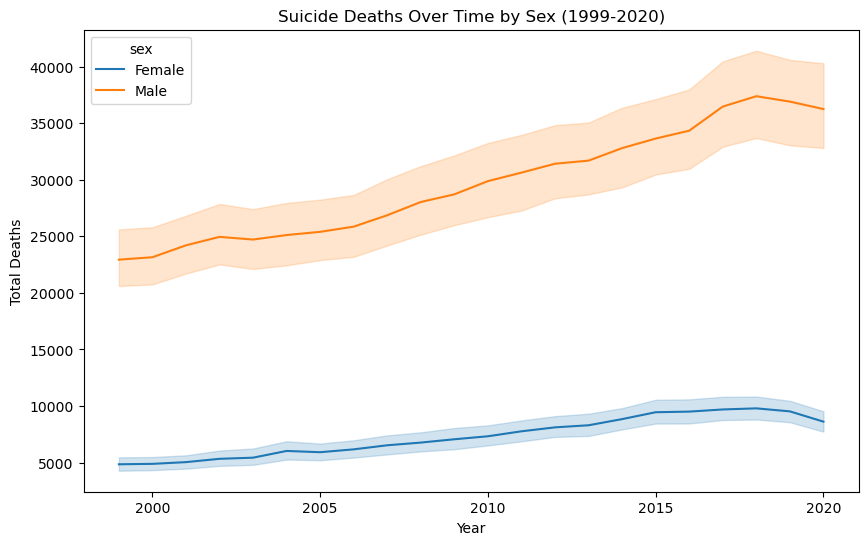

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    x="year",
    y="deaths",
    hue="sex",
    estimator="sum",
)
plt.title("Suicide Deaths Over Time by Sex (1999-2020)")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()

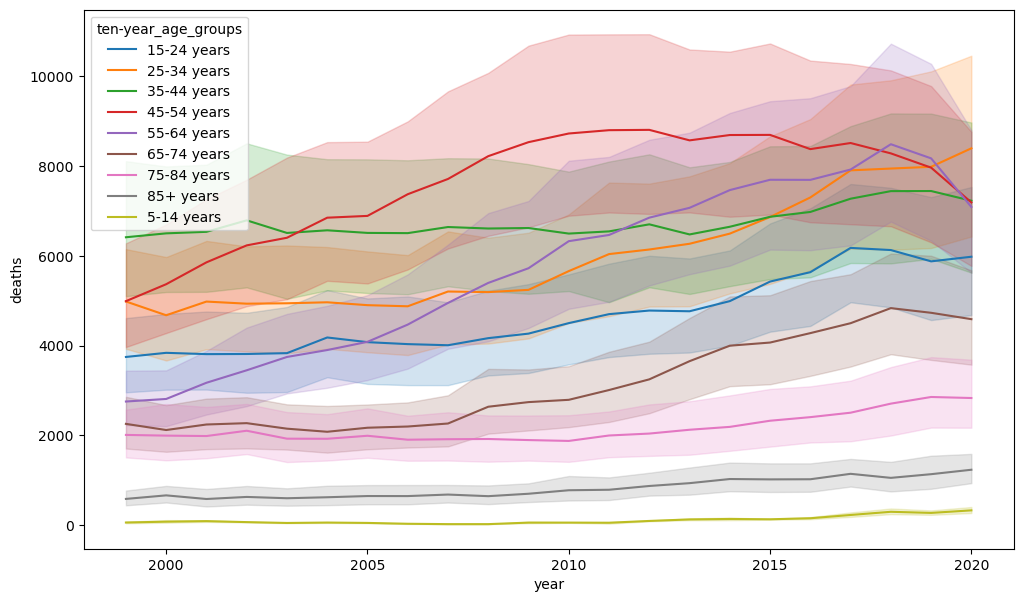

In [21]:
plt.figure(figsize=(12,7))
sns.lineplot( 
    data = df,
    x = "year",
    y = "deaths",
    hue = "ten-year_age_groups",
    estimator = "sum",
)
plt.title = ("Suicide Deaths by Age Group (1999-2020)")
plt.xlabel = ("Year")
plt.ylabel = ("Total Deaths")
plt.show()

In [24]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)

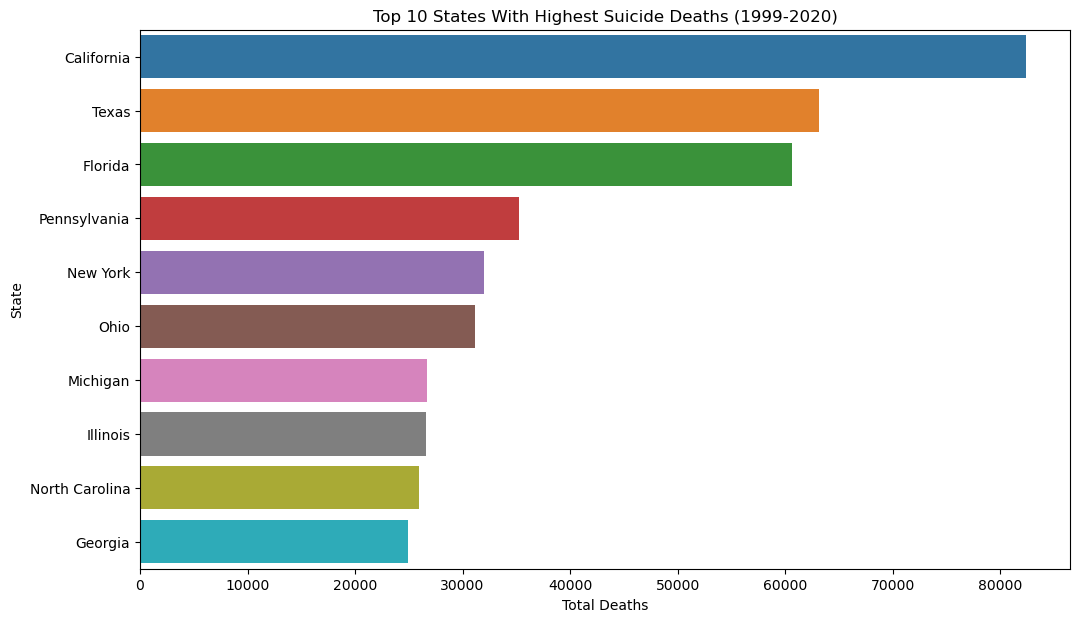

In [25]:
state_totals = (
    df.groupby("state")["deaths"]
    .sum()
    .sort_values(ascending= False)
    .head(10)
)
plt.figure(figsize=(12,7))
sns.barplot(x=state_totals.values, y=state_totals.index)
plt.title("Top 10 States With Highest Suicide Deaths (1999-2020)")
plt.xlabel("Total Deaths")
plt.ylabel("State")
plt.show()

In [28]:
trend = df.groupby(["state", "year"])["deaths"].sum().reset_index()
slopes = (
    trend.groupby("state")
    .apply(lambda x : np.polyfit(x["year"], x ["deaths"], 1)[0])
    .sort_values(ascending = False)
)
slopes.head(10)

state
Texas             95.960474
California        74.626200
Florida           65.585545
Pennsylvania      35.484472
Georgia           35.434783
Colorado          34.020892
Ohio              33.314512
Arizona           32.765104
New York          31.838509
North Carolina    29.196499
dtype: float64

In [29]:
df.to_csv("clean_suicide_data.csv", index=False)

In [30]:
import sqlite3

conn = sqlite3.connect("suicide_data.db")

df.to_sql("suicide_stats", conn, if_exists="replace", index=False)

conn.close()

In [34]:
import sqlite3
conn = sqlite3.connect("suicide_data.db")

query1 = """
SELECT sex, AVG(crude_rate) AS avg_rate
FROM suicide_stats
GROUP BY sex;
"""

pd.read_sql_query(query1, conn)


,sex,avg_rate
0,Female,8.073021
1,Male,30.387538


In [37]:
query2 = """
SELECT "ten-year_age_groups" AS age_group, AVG(crude_rate) AS avg_rate
FROM suicide_stats
GROUP BY "ten-year_age_groups"
ORDER BY avg_rate DESC;
"""

pd.read_sql_query(query2, conn)

,age_group,avg_rate
0,85+ years,52.531915
1,75-84 years,36.805078
2,65-74 years,22.824847
3,45-54 years,22.714370
4,55-64 years,21.258415
5,35-44 years,21.084668
6,25-34 years,20.931931
7,15-24 years,18.117955
8,5-14 years,1.634783


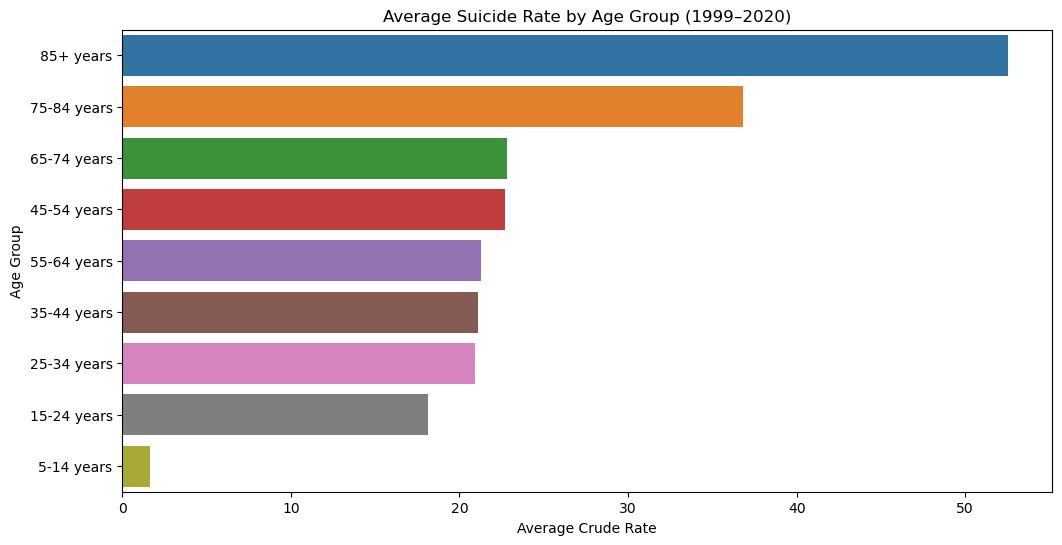

In [40]:
age_avg = (
    df.groupby("ten-year_age_groups")["crude_rate"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_avg,
    x="crude_rate",
    y="ten-year_age_groups"
)
plt.title("Average Suicide Rate by Age Group (1999–2020)")
plt.xlabel("Average Crude Rate")
plt.ylabel("Age Group")
plt.show()



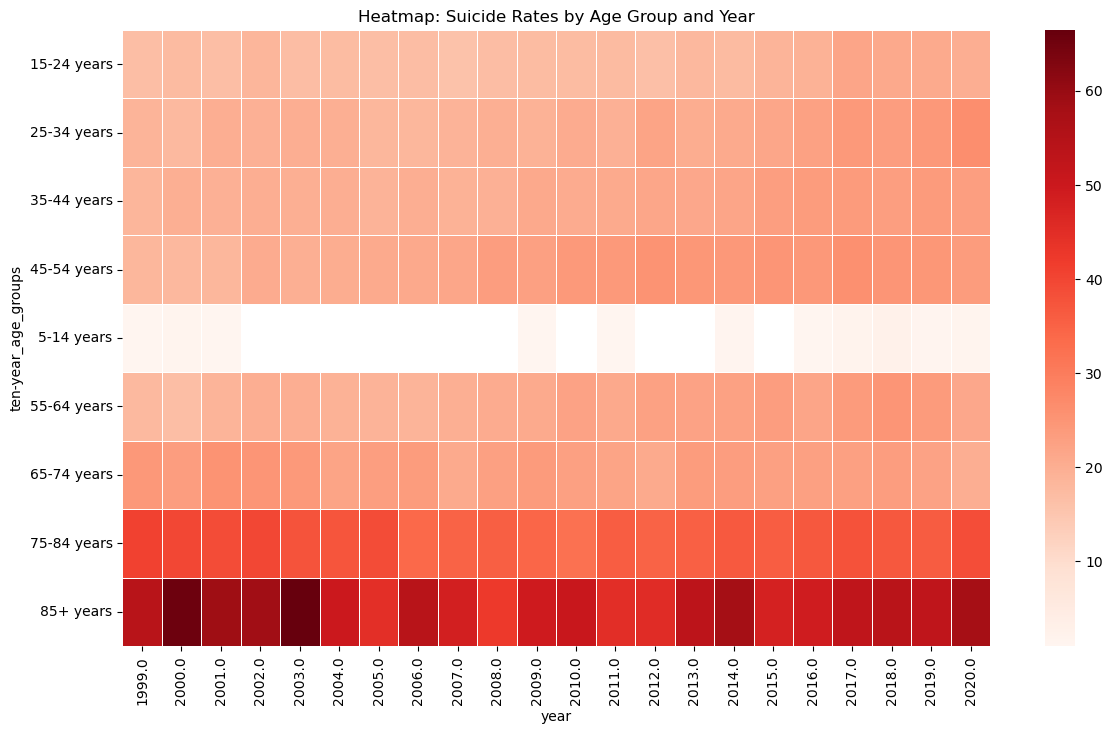

In [33]:
pivot_df = df.pivot_table(
    index="ten-year_age_groups",
    columns="year",
    values="crude_rate",
    aggfunc="mean"
)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_df, cmap="Reds", linewidths=.5)
plt.title("Heatmap: Suicide Rates by Age Group and Year")
plt.show()